In [2]:
random_seed= 42

# 13. Data Saving and Preprocess with tensorflow

- **tf.data** is a data process API to train large tensorflow models
- **tf.data** accelerate the training and enables to handle large datasets


### 13.1 Data API

- **tf.data.Dataset** means the sequence of dataset
- it uses Datasets that progressivly read data from the disk


### tf.data.Dataset

- dataset can hold tensor tuple, name/tensor dictionary


In [3]:
import tensorflow as tf

X = tf.range(10) # any tensor

# tf.data.Dataset.from_tensor_slices sequentially read data of X from 0 ~ 9
print("1. datasets")
dataset = tf.data.Dataset.from_tensor_slices(X)
print(dataset) # this is int32

print('\nEach element of the dataset')
for item in dataset:
    print(item)

1. datasets
<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

Each element of the dataset
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


2025-01-30 17:23:40.378113: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [4]:

# this has the equal performance as above but dtype is int64
print("2. datasets")
datasets2 = tf.data.Dataset.range(10)
print(datasets2)

print('\nEach element of the dataset')
for item in datasets2:
    print(item)


2. datasets
<_RangeDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>

Each element of the dataset
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(1, shape=(), dtype=int64)
tf.Tensor(2, shape=(), dtype=int64)
tf.Tensor(3, shape=(), dtype=int64)
tf.Tensor(4, shape=(), dtype=int64)
tf.Tensor(5, shape=(), dtype=int64)
tf.Tensor(6, shape=(), dtype=int64)
tf.Tensor(7, shape=(), dtype=int64)
tf.Tensor(8, shape=(), dtype=int64)
tf.Tensor(9, shape=(), dtype=int64)


2025-01-30 17:23:40.387132: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [5]:
# Dictionary
print("3. Dictionary")
X_nested = {'A': ([1,2,3], [4,5,6]),
            "b":[7,8,9]
            }
dataset_dict = tf.data.Dataset.from_tensor_slices(X_nested)
for item in dataset_dict:
    print(item)    
    print('==============')

3. Dictionary
{'A': (<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=4>), 'b': <tf.Tensor: shape=(), dtype=int32, numpy=7>}
{'A': (<tf.Tensor: shape=(), dtype=int32, numpy=2>, <tf.Tensor: shape=(), dtype=int32, numpy=5>), 'b': <tf.Tensor: shape=(), dtype=int32, numpy=8>}
{'A': (<tf.Tensor: shape=(), dtype=int32, numpy=3>, <tf.Tensor: shape=(), dtype=int32, numpy=6>), 'b': <tf.Tensor: shape=(), dtype=int32, numpy=9>}


### 13.1.1 Chain transformation

- tranfrom dataset


#### repeat and batch

- **repeat** method duplicate the original item
- **batch** method group the original data. if wwe give parameter drop_remainder = True, drop remainders so all batch have the same length


In [6]:
X = tf.range(10)
dataset = tf.data.Dataset.from_tensor_slices(X)

dataset = dataset.repeat(3).batch(7)

for item in dataset:
    print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int32)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int32)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int32)
tf.Tensor([8 9], shape=(2,), dtype=int32)


2025-01-30 17:23:40.404197: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


### map

- **map**
  - apply function to the datasets
  - it can apply any preprocess function to datasets but needs to be transformed as tf functions
  - **num_parallel_calls** : 병렬처리


In [7]:
X = tf.range(10)
dataset = tf.data.Dataset.from_tensor_slices(X)
dataset = dataset.repeat(3).batch(7)

dataset = dataset.map(lambda x: x*2) # x is a one batch

for item in dataset:
    print(item)

tf.Tensor([ 0  2  4  6  8 10 12], shape=(7,), dtype=int32)
tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int32)
tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int32)
tf.Tensor([ 2  4  6  8 10 12 14], shape=(7,), dtype=int32)
tf.Tensor([16 18], shape=(2,), dtype=int32)


#### filter

- **filter**: filter data with condition


In [8]:
X = tf.range(10)
dataset = tf.data.Dataset.from_tensor_slices(X)
dataset = dataset.repeat(3).batch(7)

dataset = dataset.filter(lambda x: tf.reduce_sum(x) > 25) # filter only batches that sum of item is greater than 50

for item in dataset:
    print(item)

tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int32)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int32)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int32)


#### take

- same as head


In [9]:
for item in dataset.take(2):
    print(item)

tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int32)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int32)


### 13.1.2 Data shuffling

- gradient descent perform best when samples in the training set are iid
- easiest way is to shuffle with **shuffle** method
  - first draw items from the dataset with size **buffer_size**
  - then when the data is requested, radomly choose one element and return
  - draw random from the original dataset and fill the buffer
  - repeat until all dataset is used


In [10]:
random_seed = 42
dataset = tf.data.Dataset.range(10).repeat(2)
dataset = dataset.shuffle(buffer_size=4, seed = random_seed).batch(7)

for itme in dataset:
    print(item)


tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int32)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int32)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int32)


2025-01-30 17:23:40.471938: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


### 13.1.3 Reading single line from multiple files

- it is optimal to shuffle the original data **shuffle**

- New functions
  - **repr**: 개발자 친화적 문자열 처리용 함수
  - **np.array_split**: 청크를 생성하는 함수


In [11]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)


# 추가 코드 - 데이터셋을 20개 파일로 분할하여 CSV 파일로 저장합니다.

import numpy as np # type: ignore
from pathlib import Path

def save_to_csv_files(data, name_prefix, header=None, n_parts=10):
    # 1. Define the directory path where the CSV files will be saved
    housing_dir = Path("./130/") / "datasets" / "housing" #    The directory structure is "./130/datasets/housing".
    housing_dir.mkdir(parents=True, exist_ok=True) # 2. Create the directory (including any necessary parent directories) if it doesn't already exist.
    
    # 3. Define the naming format for the CSV files.
    #    Each file will follow the format "my_<name_prefix>_<file_index>.csv".
    filename_format = "my_{}_{:02d}.csv" # format rules after ":", fill 0, minium 2 digis, d for integers

    # 4. Initialize an empty list to store the file paths of the created CSV files.
    filepaths = []
    # 5. Determine the total number of rows in the data.
    m = len(data)
    # 6. Split the indices of the data into 'n_parts' chunks to divide the dataset evenly.
    chunks = np.array_split(np.arange(m), n_parts)

    # 7. Loop over each chunk to save the corresponding rows into a separate CSV file.
    for file_idx, row_indices in enumerate(chunks):
        # 8. Generate the file path for the current chunk using the naming format.
        part_csv = housing_dir / filename_format.format(name_prefix, file_idx)
        # 9. Append the generated file path to the filepaths list for later reference.
        filepaths.append(str(part_csv))
        
        # 10. Open the file in write mode and write the data.
        with open(part_csv, "w") as f:
            # 11. If a header is provided, write it as the first line of the file.
            if header is not None:
                f.write(header)
                f.write("\n")
            # 12. Write each row of data in the current chunk as a comma-separated line.
            for row_idx in row_indices:
                f.write(",".join([str(col) for col in data[row_idx]]))
                f.write("\n")
    
    # 13. Return the list of file paths for the created CSV files.
    return filepaths


train_data = np.c_[X_train, y_train]
valid_data = np.c_[X_valid, y_valid]
test_data = np.c_[X_test, y_test]
header_cols = housing.feature_names + ["MedianHouseValue"]
header = ",".join(header_cols)

train_filepaths = save_to_csv_files(train_data, "train", header, n_parts=20)
valid_filepaths = save_to_csv_files(valid_data, "valid", header, n_parts=10)
test_filepaths = save_to_csv_files(test_data, "test", header, n_parts=10)

#### Read few llines


In [12]:
print("".join(open(train_filepaths[0]).readlines()[:4]))

MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
3.5214,15.0,3.0499445061043287,1.106548279689234,1447.0,1.6059933407325193,37.63,-122.43,1.442
5.3275,5.0,6.490059642147117,0.9910536779324056,3464.0,3.4433399602385686,33.69,-117.39,1.687
3.1,29.0,7.5423728813559325,1.5915254237288134,1328.0,2.2508474576271187,38.44,-122.98,1.621



### Dataset.list_files

- takes file paths and return the shuffeld dataset
- seht shuffle=False to get unshuffle data

- **interleave** method
  - n_readers: number of Datasets to create, merged into 1 file later
  - num_parallel_calls: for parallel process


In [13]:
"""
tf.data.Dataset.list_files: 파일 경로를 데이터셋으로 변환.
TextLineDataset: 파일 내용을 텍스트 라인 단위로 읽어 처리.
skip(1): 헤더 제거.
interleave: 여러 파일을 병렬로 읽고, 데이터를 하나의 데이터셋으로 결합.
"""
random_seed = 42

filepath_dataset = tf.data.Dataset.list_files(train_filepaths, seed = random_seed)

for item in filepath_dataset:
    print(item)
    

tf.Tensor(b'130/datasets/housing/my_train_05.csv', shape=(), dtype=string)
tf.Tensor(b'130/datasets/housing/my_train_16.csv', shape=(), dtype=string)
tf.Tensor(b'130/datasets/housing/my_train_01.csv', shape=(), dtype=string)
tf.Tensor(b'130/datasets/housing/my_train_17.csv', shape=(), dtype=string)
tf.Tensor(b'130/datasets/housing/my_train_00.csv', shape=(), dtype=string)
tf.Tensor(b'130/datasets/housing/my_train_14.csv', shape=(), dtype=string)
tf.Tensor(b'130/datasets/housing/my_train_10.csv', shape=(), dtype=string)
tf.Tensor(b'130/datasets/housing/my_train_02.csv', shape=(), dtype=string)
tf.Tensor(b'130/datasets/housing/my_train_12.csv', shape=(), dtype=string)
tf.Tensor(b'130/datasets/housing/my_train_19.csv', shape=(), dtype=string)
tf.Tensor(b'130/datasets/housing/my_train_07.csv', shape=(), dtype=string)
tf.Tensor(b'130/datasets/housing/my_train_09.csv', shape=(), dtype=string)
tf.Tensor(b'130/datasets/housing/my_train_13.csv', shape=(), dtype=string)
tf.Tensor(b'130/datasets/

In [14]:
n_readers = 5   

dataset = filepath_dataset.interleave(
    lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
    cycle_length = n_readers,

    num_parallel_calls = tf.data.AUTOTUNE
)

for item in dataset.take(5):
    print(item)

tf.Tensor(b'4.5909,16.0,5.475877192982456,1.0964912280701755,1357.0,2.9758771929824563,33.63,-117.71,2.418', shape=(), dtype=string)
tf.Tensor(b'2.4792,24.0,3.4547038327526134,1.1341463414634145,2251.0,3.921602787456446,34.18,-118.38,2.0', shape=(), dtype=string)
tf.Tensor(b'4.2708,45.0,5.121387283236994,0.953757225433526,492.0,2.8439306358381504,37.48,-122.19,2.67', shape=(), dtype=string)
tf.Tensor(b'2.1856,41.0,3.7189873417721517,1.0658227848101265,803.0,2.0329113924050635,32.76,-117.12,1.205', shape=(), dtype=string)
tf.Tensor(b'4.1812,52.0,5.701388888888889,0.9965277777777778,692.0,2.4027777777777777,33.73,-118.31,3.215', shape=(), dtype=string)


### 13.1.4 Data Preprocess with Tensorflow

- tranfrom data with data tpye of byte strings type into tensor and label tensor


In [15]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_mean, X_std = scaler.mean_, scaler.scale_
n_inputs = 8

"""
parse_csv_line
    목적: CSV 파일의 각 열에 대한 기본값(record_defaults)을 정의
    구조:
        [0.] * n_inputs: 입력 데이터(X)에 대해 기본값을 0.0으로 설정.
        n_inputs: CSV 파일의 입력 피처 개수를 나타냄.
        [tf.constant([], dtype=tf.float32)]: 출력 데이터(y)에 대해 기본값을 빈 텐서([])로 설정.
        빈 텐서는 실제 데이터가 있을 때 해당 위치를 채울 수 있도록 gka,
    예제:
        line = "1.0,2.0,3.0,4.0", defs = [0.0, 0.0, 0.0, tf.constant([], dtype=tf.float32)]
        결과: [1.0, 2.0, 3.0, 4.0] (1D 텐서 형태).
        
"""
def parse_csv_line(line):
    defs = [0.] * n_inputs + [tf.constant([], dtype = tf.float32)]
    fields = tf.io.decode_csv(line, record_defaults=defs)  # 스칼라 텐서 반환
    # fields = [tf.Tensor(4.5), tf.Tensor(3.2), ..., tf.Tensor(4.8), tf.Tensor(1.0)]
    
    
    #X = tf.stack([4.5, 3.2, 6.8, 2.1, 5.5, 7.2, 3.6, 4.8])
    #y = tf.stack([1.0])
    return tf.stack(fields[:-1]), tf.stack(fields[-1:]) # stack makes field to 1D tensor

def preprocess(line):
    x, y = parse_csv_line(line)
    return (x - X_mean) / X_std, y

preprocess(b'4.2083,44.0,5.3232,0.9171,846.0,2.3370,37.47,-122.2,2.782')

(<tf.Tensor: shape=(8,), dtype=float32, numpy=
 array([ 0.16579159,  1.216324  , -0.05204564, -0.39215982, -0.5277444 ,
        -0.2633488 ,  0.8543046 , -1.3072058 ], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([2.782], dtype=float32)>)

In [16]:
"""
Parameters
    - filepaths: 읽어들일 CSV 파일들의 경로 리스트. 예: ["file1.csv", "file2.csv"].
    - n_readers: 동시에 읽을 파일 개수. 병렬적으로 데이터를 읽어 성능을 향상.
    - n_read_threads: 파일 읽기 작업에 사용할 쓰레드 수. 기본값 None인 경우 TensorFlow가 자동으로 최적의 쓰레드 수를 설정.
    - n_parse_threads: 데이터 파싱에 사용할 쓰레드 수.
    - shuffle_buffer_size: 데이터 섞기(shuffling)에 사용할 버퍼 크기. 클수록 더 잘 섞이지만 메모리 사용량 증가.
    - seed: 랜덤 시드 값. 동일한 순서를 재현할 수 있음.
    - batch_size: 데이터 배치 크기. 한 번에 반환할 데이터 샘플 수.
"""

def csv_reader_dataset(filepaths, n_readers=5, n_read_threads=tf.data.AUTOTUNE,
                       n_parse_threads=5, shuffle_buffer_size=10_000, seed=42,
                       batch_size=32, repeat = True):
    dataset = tf.data.Dataset.list_files(filepaths, seed=seed) # 주어진 파일 경로(filepaths)를 기반으로 랜덤하게 섞인 데이터셋
    """
    interleave:
        여러 파일을 병렬로 읽고 데이터를 결합.
        cycle_length=n_readers: 동시에 읽을 파일 수.
        num_parallel_calls=n_read_threads: 병렬로 읽기 위한 쓰레드 수.
        tf.data.TextLineDataset(filepath).skip(1):

        CSV 파일을 한 줄씩 읽는 데이터셋 생성.
        .skip(1): CSV 파일의 헤더(첫 번째 줄)를 건너뜀.
    """
    dataset = dataset.interleave(
        lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
        cycle_length=n_readers,
        num_parallel_calls=n_read_threads)
    
    """
    map(preprocess):
        preprocess 함수를 사용해 각 줄 데이터를 전처리.
        num_parallel_calls=n_parse_threads: 여러 쓰레드에서 병렬로 전처리 작업 수행.
        
        preprocess의 동작:
            parse_csv_line으로 데이터를 파싱하여 입력(X)과 출력(y)을 나눔.
            입력(X)은 정규화((x - X_mean) / X_std) 수행.
    """
    dataset = dataset.map(preprocess, num_parallel_calls=n_parse_threads)
    """
    shuffle:
        데이터를 랜덤하게 섞어 모델 학습의 편향을 방지.
        shuffle_buffer_size=10_000: 10,000개의 데이터를 메모리에 유지하며 섞음.
    """
    dataset = dataset.shuffle(shuffle_buffer_size, seed=seed)
    
    """
    batch(batch_size):
        데이터셋을 지정된 크기(batch_size)로 나눔.
        예: batch_size=32이면 32개의 샘플이 하나의 배치로 반환.
    
    prefetch(1):
        데이터를 미리 로드하여 모델 학습 중 데이터 I/O 병목을 방지.
        학습이 진행되는 동안 다음 배치를 미리 준비.

    """
    
    dataset = dataset.batch(batch_size, drop_remainder=False).prefetch(1)
    if repeat:
        dataset = dataset.repeat()
    return dataset

### 13.1.6 prefetch

- prefetch method enhances the performance by preparing the next batch ready to use
- prefetch + multi-thread loding boost up the training performance


### 13.1.7 Use Keras and Dataset

- with **csv_reader_dataset** we can create dataset of training, valid, test set
- all datasets get shuffled for every epoch


In [17]:
#tf.keras.backend.clear_session()

train_set = csv_reader_dataset(train_filepaths, repeat= True)
valid_set = csv_reader_dataset(valid_filepaths, repeat= True)
test_set = csv_reader_dataset(test_filepaths, repeat=False)

n_train_samples = len(X_train)
n_valid_samples = len(X_valid)

batch_size = 32

steps_per_epoch = n_train_samples // batch_size  # 한 에폭 동안 처리할 배치 수
validation_steps = n_valid_samples // batch_size  # 한 에폭 동안 처리할 검증 배치 수

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape = X_train.shape[1:]),
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(1),
])
model.compile(loss="mse", optimizer="sgd")


model.fit(train_set,steps_per_epoch = steps_per_epoch,
          validation_data=valid_set, validation_steps= validation_steps,
          epochs=15,
          )



Epoch 1/15
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 543us/step - loss: 1.3374 - val_loss: 121.7395
Epoch 2/15
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - loss: 1.8730 - val_loss: 2.9232
Epoch 3/15
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 0.5187 - val_loss: 23.5538
Epoch 4/15
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 341us/step - loss: 0.5523 - val_loss: 0.4640
Epoch 5/15
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - loss: 0.4492 - val_loss: 0.4018
Epoch 6/15
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - loss: 0.4044 - val_loss: 0.3692
Epoch 7/15
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - loss: 0.3932 - val_loss: 0.3740
Epoch 8/15
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - loss: 0.3852 - val_loss: 0.3804
Epoch 9/15
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - loss: 0.3780 - val_loss: 0.3545
Epoch 10/15
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - loss: 0.3765 - val_loss: 0.3764
Epoch 11/15
362/362 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - loss: 0.3729 - val_loss: 0.3771
Epoch 12/15
362/362 ━━━━━━━

In [19]:
test_mse = model.evaluate(test_set)
new_set = test_set.take(3)
y_pred = model.predict(new_set)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 192us/step - loss: 0.3625
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


# 13.2 TFRecord Format

- csv is not suitable for saving complex data likeimage or audio
- **TFRecord** format is preferred to save and load the large dataset with tensorflow
- **TFRecord** is a binary format to save continuous binary record
- Basically **TFRecordDataset** read file one by one.
  - pass **num_parallel_reads** more than 1 to read data alternately


In [15]:
# Create TFRecord object
with tf.io.TFRecordWriter('./130/my_data.tfrecord') as f:
    f.write(b"This is the first record")
    f.write(b"And this is the second record")

filepaths = ["./130/my_data.tfrecord"]
dataset = tf.data.TFRecordDataset(filepaths)
for item in dataset:
    print(item)

tf.Tensor(b'This is the first record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)


2025-01-08 13:39:05.449104: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:370] TFRecordDataset `buffer_size` is unspecified, default to 262144


### 13.2.1 Compressed TFRecord file

- when the file requires small storage usage, need to compress the files


In [22]:
# Saving data
options = tf.io.TFRecordOptions(compression_type="GZIP")
with tf.io.TFRecordWriter("./130/my_compressed.tfrecord", options) as f:
    f.write(b"Compress, compress, compress!")
    
# Reading data

dataset = tf.data.TFRecordDataset(["my_compressed.tfrecord"],
                                  compression_type="GZIP")

for item in dataset:
    print(item)

tf.Tensor(b'Compress, compress, compress!', shape=(), dtype=string)


2025-01-31 13:37:28.140761: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:370] TFRecordDataset `buffer_size` is unspecified, default to 262144


### 13.2.2 Protocol Buffer


In [23]:
# protocol buffer definition
%%writefile person.proto
syntax = "proto3";
message Person {
    string name = 1;
    int32 id = 2;
    repeated string email = 3;
}

Writing person.proto


In [24]:
!protoc person.proto --python_out=. --descriptor_set_out=person.desc --include_imports

In [25]:
%ls person*

person.desc    person.proto   person_pb2.py


In [26]:
from person_pb2 import Person  # import the generated access class

person = Person(name="Al", id=123, email=["a@b.com"])  # create a Person
print(person)  # display the Person

name: "Al"
id: 123
email: "a@b.com"



In [28]:
serialized = person.SerializeToString()  # serialize person to a byte string
serialized

b'\n\x02Al\x10{\x1a\x07a@b.com'

In [29]:
person2 = Person()  # create a new Person
person2.ParseFromString(serialized)  # parse the byte string (27 bytes long)
person2

15

### 13.2.3 Tensorflow protobufs


In [33]:
from tensorflow.train import BytesList, FloatList, Int64List
from tensorflow.train import Feature, Features, Example

person_example = Example(
    features=Features(
        feature={
            "name": Feature(bytes_list=BytesList(value=[b"Alice"])),
            "id": Feature(int64_list=Int64List(value=[123])),
            "emails": Feature(bytes_list=BytesList(value=[b"a@b.com",
                                                          b"c@d.com"]))
        }))

with tf.io.TFRecordWriter("./130/my_contacts.tfrecord") as f:
    for _ in range(5):
        f.write(person_example.SerializeToString())

In [34]:
feature_description = {
    "name": tf.io.FixedLenFeature([], tf.string, default_value=""),
    "id": tf.io.FixedLenFeature([], tf.int64, default_value=0),
    "emails": tf.io.VarLenFeature(tf.string),
}

def parse(serialized_example):
    return tf.io.parse_single_example(serialized_example, feature_description)

dataset = tf.data.TFRecordDataset(["./130/my_contacts.tfrecord"]).map(parse)
for parsed_example in dataset:
    print(parsed_example)

{'emails': SparseTensor(indices=tf.Tensor(
[[0]
 [1]], shape=(2, 1), dtype=int64), values=tf.Tensor([b'a@b.com' b'c@d.com'], shape=(2,), dtype=string), dense_shape=tf.Tensor([2], shape=(1,), dtype=int64)), 'id': <tf.Tensor: shape=(), dtype=int64, numpy=123>, 'name': <tf.Tensor: shape=(), dtype=string, numpy=b'Alice'>}
{'emails': SparseTensor(indices=tf.Tensor(
[[0]
 [1]], shape=(2, 1), dtype=int64), values=tf.Tensor([b'a@b.com' b'c@d.com'], shape=(2,), dtype=string), dense_shape=tf.Tensor([2], shape=(1,), dtype=int64)), 'id': <tf.Tensor: shape=(), dtype=int64, numpy=123>, 'name': <tf.Tensor: shape=(), dtype=string, numpy=b'Alice'>}
{'emails': SparseTensor(indices=tf.Tensor(
[[0]
 [1]], shape=(2, 1), dtype=int64), values=tf.Tensor([b'a@b.com' b'c@d.com'], shape=(2,), dtype=string), dense_shape=tf.Tensor([2], shape=(1,), dtype=int64)), 'id': <tf.Tensor: shape=(), dtype=int64, numpy=123>, 'name': <tf.Tensor: shape=(), dtype=string, numpy=b'Alice'>}
{'emails': SparseTensor(indices=tf.Tenso

2025-01-31 14:03:21.895612: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
tf.sparse.to_dense(parsed_example["emails"], default_value=b"")

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'a@b.com', b'c@d.com'], dtype=object)>

In [36]:
parsed_example["emails"].values

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'a@b.com', b'c@d.com'], dtype=object)>

In [37]:
# 배치 단위 파싱
def parse(serialized_examples):
    return tf.io.parse_example(serialized_examples, feature_description)

dataset = tf.data.TFRecordDataset(["my_contacts.tfrecord"]).batch(2).map(parse)
for parsed_examples in dataset:
    print(parsed_examples)  # two examples at a time

{'emails': SparseTensor(indices=tf.Tensor(
[[0 0]
 [0 1]
 [1 0]
 [1 1]], shape=(4, 2), dtype=int64), values=tf.Tensor([b'a@b.com' b'c@d.com' b'a@b.com' b'c@d.com'], shape=(4,), dtype=string), dense_shape=tf.Tensor([2 2], shape=(2,), dtype=int64)), 'id': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([123, 123])>, 'name': <tf.Tensor: shape=(2,), dtype=string, numpy=array([b'Alice', b'Alice'], dtype=object)>}
{'emails': SparseTensor(indices=tf.Tensor(
[[0 0]
 [0 1]
 [1 0]
 [1 1]], shape=(4, 2), dtype=int64), values=tf.Tensor([b'a@b.com' b'c@d.com' b'a@b.com' b'c@d.com'], shape=(4,), dtype=string), dense_shape=tf.Tensor([2 2], shape=(2,), dtype=int64)), 'id': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([123, 123])>, 'name': <tf.Tensor: shape=(2,), dtype=string, numpy=array([b'Alice', b'Alice'], dtype=object)>}
{'emails': SparseTensor(indices=tf.Tensor(
[[0 0]
 [0 1]], shape=(2, 2), dtype=int64), values=tf.Tensor([b'a@b.com' b'c@d.com'], shape=(2,), dtype=string), dense_shape=tf.Ten

### 13.2.4 Pandas Dataframe to TFRecord


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  3 non-null      float64
 1   feature2  3 non-null      int64  
 2   feature3  3 non-null      object 
dtypes: float64(1), int64(1), object(1)
memory usage: 204.0+ bytes


,feature1,feature2,feature3
0,12.0,70,AAAAAAAAAA
1,34.0,80,BBBBBBBBBB
2,56.0,90,CCCCCCCCCC


In [67]:
import tensorflow as tf
import pandas as pd

# 샘플 데이터프레임 생성
df = pd.DataFrame({
    "feature1": [1.2, 3.4, 5.6],
    "feature2": [7, 8, 9],
    "feature3": ["A", "B", "C"]
})

import tensorflow as tf
import pandas as pd

# 샘플 데이터프레임 생성
df = pd.DataFrame({
    "feature1": [1.2, 3.4, 5.6],
    "feature2": [7, 8, 9],
    "feature3": ["A", "B", "C"]
})

# ✅ float64 → float32 변환
df = df.astype({"feature1": "float32", "feature2": "float32"})

df_new = df.copy()
for i in range(100000):
    df_new = pd.concat([df_new,df])

df_new.to_csv('./130/data.csv')



# ✅ TFRecord 저장 함수 (자동 타입 매칭)
def serialize_example(row):
    feature = {}
    for col, value in row.items():
        if isinstance(value, float):
            feature[col] = tf.train.Feature(float_list=tf.train.FloatList(value=[value]))
        elif isinstance(value, int):
            feature[col] = tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))
        elif isinstance(value, str):
            feature[col] = tf.train.Feature(bytes_list=tf.train.BytesList(value=[value.encode()]))
    
    example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
    return example_proto.SerializeToString()

# ✅ TFRecord 저장
tfrecord_file = "./130/dynamic_data.tfrecord"
options = tf.io.TFRecordOptions(compression_type="GZIP")

#with tf.io.TFRecordWriter(tfrecord_file,options=options) as writer:
with tf.io.TFRecordWriter(tfrecord_file) as writer:
    for _, row in df_new.iterrows():
        writer.write(serialize_example(row))

# ✅ TFRecord 읽기 (자동 타입 매칭)
def parse_tfrecord(serialized_example):
    feature_description = {
        col: tf.io.FixedLenFeature([], tf.float32) if df_new[col].dtype.kind == "f"  # 🔹 float 체크
        else tf.io.FixedLenFeature([], tf.string)  # 🔹 그 외 (문자열)
        for col in df_new.columns
    }
    return tf.io.parse_single_example(serialized_example, feature_description)


# ✅ TFRecordDataset 로드
#dataset = tf.data.TFRecordDataset("./130/dynamic_data.tfrecord",compression_type="GZIP")
dataset = tf.data.TFRecordDataset("./130/dynamic_data.tfrecord")
dataset = dataset.map(parse_tfrecord)

# ✅ 데이터 확인
for record in dataset.take(3):
    print(record)


{'feature1': <tf.Tensor: shape=(), dtype=float32, numpy=1.2000000476837158>, 'feature2': <tf.Tensor: shape=(), dtype=float32, numpy=7.0>, 'feature3': <tf.Tensor: shape=(), dtype=string, numpy=b'A'>}
{'feature1': <tf.Tensor: shape=(), dtype=float32, numpy=3.4000000953674316>, 'feature2': <tf.Tensor: shape=(), dtype=float32, numpy=8.0>, 'feature3': <tf.Tensor: shape=(), dtype=string, numpy=b'B'>}
{'feature1': <tf.Tensor: shape=(), dtype=float32, numpy=5.599999904632568>, 'feature2': <tf.Tensor: shape=(), dtype=float32, numpy=9.0>, 'feature3': <tf.Tensor: shape=(), dtype=string, numpy=b'C'>}


2025-01-31 14:46:57.904893: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


# 13.3 Preprocess layer in Keras

There are few method of preprocessing

- using numpy, pandas, scikit-learn to preprocess
- using map() function of dataset to apply prerpocess function while loading data
- add preprocess layer inside of the model, and preprocess while training -> learn this chapter
- keras preprocess layer can be used in **tf.data** API -> can pass to adapt()


### 13.3.1 Normalization Layer

- Keras provide normalization layer to normalize the features
- it can set the mean and std for each feature when add the layer or **adapt** to compute before training


In [16]:
# Method1 apply Normalization at every epoch -> slow down the training
norm_layer = tf.keras.layers.Normalization()
model = tf.keras.models.Sequential([
    norm_layer,
    tf.keras.layers.Dense(1)
])

model.compile(loss = 'mse', optimizer=tf.keras.optimizers.SGD(learning_rate= 2e-3))
norm_layer.adapt(X_train) # compute the mean and std for each feature
model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs=5)

Epoch 1/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - loss: 3.5607 - val_loss: 1.9126
Epoch 2/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step - loss: 0.7702 - val_loss: 0.8890
Epoch 3/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 299us/step - loss: 0.6316 - val_loss: 0.5446
Epoch 4/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - loss: 0.5917 - val_loss: 0.6171
Epoch 5/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - loss: 0.5661 - val_loss: 0.9291


In [17]:
tf.keras.backend.clear_session()

# Method2: apply normlization once before training
### CAUTION: this only cannot preprocess the new input after deployment
norm_layer = tf.keras.layers.Normalization()
norm_layer.adapt(X_train) # compute the mean and std for each feature
X_train_scaled = norm_layer(X_train)

X_valid_scaled = norm_layer(X_valid)
model = tf.keras.models.Sequential([tf.keras.layers.Dense(1)])
model.compile(loss = 'mse', optimizer=tf.keras.optimizers.SGD(learning_rate= 2e-3))
model.fit(X_train_scaled, y_train, validation_data = (X_valid_scaled, y_valid), epochs=5)

# Solve the new input preprocess issue
final_model = tf.keras.models.Sequential([norm_layer, model])

X_new = X_test[:3]

y_pred = final_model.predict(X_new) # 


Epoch 1/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - loss: 3.4671 - val_loss: 1.1370
Epoch 2/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - loss: 0.7077 - val_loss: 0.8872
Epoch 3/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step - loss: 0.5627 - val_loss: 0.6509
Epoch 4/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step - loss: 0.5620 - val_loss: 0.8847
Epoch 5/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step - loss: 0.5350 - val_loss: 1.1706
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


### 13.3.2 Discretization Layer

Numerical -> Categorical

- map numerical variable to categorical identifier variable with certain range call "bin"
- Useful when feature is very non-linear or multimodal distribution
- we can pass the number of bins or speicific boundary
- the categorical variable needs to be encoded with **One-Hot Encoding**


In [19]:
age = tf.constant([[20.], [94.], [57.], [18.], [37.], [5.]])

# METHOD1: Provide boundarty
discretize_layer = tf.keras.layers.Discretization(bin_boundaries=[18., 50.])
age_categories = discretize_layer(age)
age_categories

<tf.Tensor: shape=(6, 1), dtype=int64, numpy=
array([[1],
       [2],
       [2],
       [1],
       [1],
       [0]])>

In [20]:
# METHOD2: pass the number of bins
discretize_layer = tf.keras.layers.Discretization(num_bins=3)
discretize_layer.adapt(age)
age_categories = discretize_layer(age)
age_categories

<tf.Tensor: shape=(6, 1), dtype=int64, numpy=
array([[1],
       [2],
       [2],
       [1],
       [2],
       [0]])>

### 13.3.3 CategoryEncoding Layer

Categorical -> 1Hot

- if the category is small enough, like < 20, then One hot is good choice


In [21]:
onehot_layer = tf.keras.layers.CategoryEncoding(num_tokens=3)
onehot_layer(age_categories)

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)>

### 13.3.4 StringLoopup Layer

Categorical -> 1Hot

- Unknown categoreis map to value 0


In [23]:
cities = ['Auckland','Paris', 'Paris',' SF']
str_lookup_layer = tf.keras.layers.StringLookup()
str_lookup_layer.adapt(cities)
str_lookup_layer([["Paris"],['Auckland'], ['Auckland'], ['Montreal']]) # Montreal become 0

<tf.Tensor: shape=(4, 1), dtype=int64, numpy=
array([[1],
       [2],
       [2],
       [0]])>

In [24]:
# Returns the one hot vector
str_lookup_layer = tf.keras.layers.StringLookup(output_mode='one_hot')
str_lookup_layer.adapt(cities)
str_lookup_layer([["Paris"],['Auckland'], ['Auckland'], ['Montreal']]) # Montreal become 0

<tf.Tensor: shape=(4, 4), dtype=int64, numpy=
array([[0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0]])>

### 13.3.6 Feature Ecoding with Embedding

- Embedding is a dense expression of high-dim data such as natural language
- if there is 50000 categoreis, the 1Hot create a sparse vectors of 50000dim. But Embedding takes about 100
- Embedding is randomly intialized and trained with gradient descent
- keras provide the **Embedding** layer which surround the embedding matrix
  - this matrix has one row each for a single category, and one column for for a single embedding dimension
  - input_dim represent the # of categories
  - usually embed with 10 ~ 300 dimension


In [25]:
tf.random.set_seed(random_seed)
embedding_layer = tf.keras.layers.Embedding(input_dim=5, output_dim=2)
embedding_layer(np.array([2, 4, 2])) # maps to the 2nd, 4th, 2nd row of the Embedding matrix

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.04073   ,  0.00566391],
       [-0.04624665,  0.02821373],
       [-0.04073   ,  0.00566391]], dtype=float32)>

##### Categorical Variable Embedding


In [89]:
tf.random.set_seed(42)
ocean_prox = ["<1H OCEAN", "INLAND", "NEAR OCEAN", "NEAR BAY", "ISLAND"]
str_lookup_layer = tf.keras.layers.StringLookup()
str_lookup_layer.adapt(ocean_prox)
lookup_and_embed = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=[], dtype=tf.string),  # WORKAROUND
    str_lookup_layer,
    tf.keras.layers.Embedding(input_dim=str_lookup_layer.vocabulary_size(),
                              output_dim=2)
])
lookup_and_embed(np.array(["<1H OCEAN", "ISLAND", "<1H OCEAN"]))

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[ 0.01927712,  0.03931946],
       [-0.02086409, -0.02310171],
       [ 0.03650803, -0.01489996],
       [-0.02812928,  0.00667504],
       [ 0.03650803, -0.01489996]], dtype=float32)>

#### Categorical embedding + numerical variable model


In [96]:
str_lookup_layer(X_train_cat)

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([1, 3, 4, ..., 2, 1, 2])>

In [97]:
tf.keras.backend.clear_session()
# Mock Data
ocean_prox = ["<1H OCEAN", "INLAND", "NEAR OCEAN", "NEAR BAY", "ISLAND"]
tf.random.set_seed(42)
np.random.seed(42)
X_train_num = np.random.rand(10_000, 8)
X_train_cat = np.random.choice(ocean_prox, size=10_000)
y_train = np.random.rand(10_000, 1)

X_valid_num = np.random.rand(2_000, 8)
X_valid_cat = np.random.choice(ocean_prox, size=2_000)
y_valid = np.random.rand(2_000, 1)

X_train_cat = tf.convert_to_tensor(X_train_cat, dtype=tf.string)
X_valid_cat = tf.convert_to_tensor(X_valid_cat, dtype=tf.string)


str_lookup_layer = tf.keras.layers.StringLookup()
str_lookup_layer.adapt(X_train_cat)

lookup_and_embed = tf.keras.Sequential([
    str_lookup_layer,
    tf.keras.layers.Embedding(input_dim=str_lookup_layer.vocabulary_size(), output_dim=2)
])

num_input = tf.keras.layers.Input([8], name = 'num')
cat_input = tf.keras.Input(shape = [], dtype=tf.string, name = "cat")

cat_embeddings = lookup_and_embed(cat_input)
encoded_inputs = tf.keras.layers.concatenate([num_input, cat_embeddings])

outputs = tf.keras.layers.Dense(1)(encoded_inputs)
model = tf.keras.models.Model(inputs=[num_input, cat_input], outputs = [outputs])

model.compile(loss = 'mse', optimizer='sgd')

model.summary()

# Train Model
history = model.fit((X_train_num, X_train_cat), y_train, epochs=5,
                    validation_data=((X_valid_num, X_valid_cat), y_valid))

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ cat (InputLayer)    │ (None)            │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ num (InputLayer)    │ (None, 8)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 2)         │         12 │ cat[0][0]         │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 10)        │          0 │ num[0][0],        │
│ (Concatenate)       │                   │            │ sequential[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 1)         │         11 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 23 (92.00 B)

 Trainable params: 23 (92.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - loss: 0.2335 - val_loss: 0.1285
Epoch 2/5
  3/313 ━━━━━━━━━━━━━━━━━━━━ 0s 297us/step - loss: 0.1112

/Users/yunjaecho/Git/practical_ml_dl/env/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['num', 'cat']. Received: the structure of inputs=('*', '*')
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - loss: 0.1214 - val_loss: 0.0998
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - loss: 0.0968 - val_loss: 0.0894
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step - loss: 0.0877 - val_loss: 0.0856
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 262us/step - loss: 0.0843 - val_loss: 0.0841


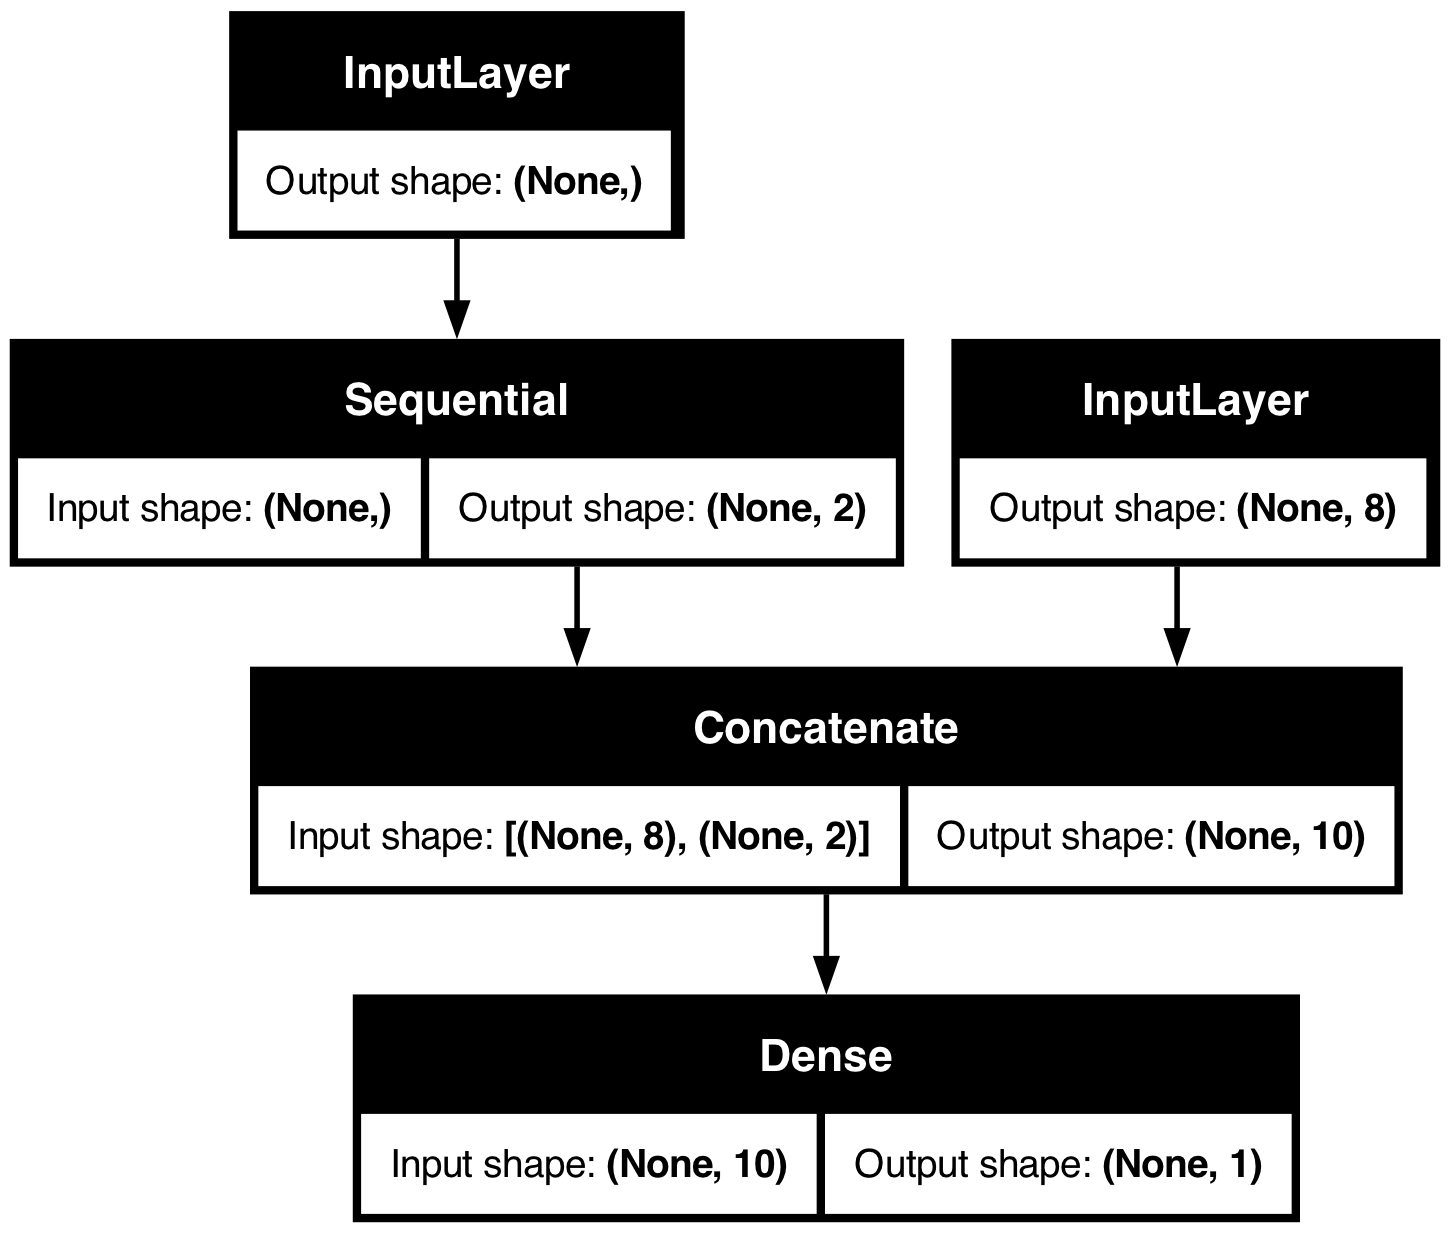

In [98]:
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

### 13.3.7 Test Preprocess

- TextVectorization layer preprocess the text data
- similar to StringLookup
- with adapt fucntion, it learns te vocab dictionary
- Unknown word will be encoded with 1

TextVectorization options

- If want to keep the Large/Small Cases and period, set standardize=None
- If want to pass the customized standardize function, pass the standardize =
- with output_seqeunce_length parameter, we can padding or slice the output sentence


In [99]:
train_data = ['To be', "!(to be)", "That's the question", "Be, be, be."]
text_vec_layer = tf.keras.layers.TextVectorization()
text_vec_layer.adapt(train_data)
text_vec_layer(['Be good!', 'Question: be or be?']) # The result must be encoded with Embedding layer

<tf.Tensor: shape=(2, 4), dtype=int64, numpy=
array([[2, 1, 0, 0],
       [6, 2, 1, 2]])>

In [100]:
text_vec_layer.get_vocabulary()

['',
 '[UNK]',
 np.str_('be'),
 np.str_('to'),
 np.str_('the'),
 np.str_('thats'),
 np.str_('question')]

#### TF-IDF with TextVectorization layer


In [101]:
train_data = ['To be', "!(to be)", "That's the question", "Be, be, be."]
text_vec_layer = tf.keras.layers.TextVectorization(output_mode="tf-idf")
text_vec_layer.adapt(train_data)
text_vec_layer(['Be good!', 'Question: be or be?']) # The result must be encoded with Embedding layer

<tf.Tensor: shape=(2, 6), dtype=float32, numpy=
array([[0.96725637, 0.6931472 , 0.        , 0.        , 0.        ,
        0.        ],
       [0.96725637, 1.3862944 , 0.        , 0.        , 0.        ,
        1.0986123 ]], dtype=float32)>

### 13.3.8 Using Pretrained Language Model

- normal TF-IDF, word count would not result in good performance. it losses the word order and relation btw words
- instead, it's good to use the Tensorflow Text library for better text preprocess
- With **Tensorflow Hub Library**, we can reuse many text, image, audio training elements call "module"


In [104]:
import tensorflow_hub as hub

#  download sentence encoder module
hub_layer = hub.KerasLayer("https://tfhub.dev/google/nnlm-en-dim50/2")

sentence_embeddings = hub_layer(tf.constant(["To be", "Not to be"]))
sentence_embeddings.numpy().round(2)

array([[-0.25,  0.28,  0.01,  0.1 ,  0.14,  0.16,  0.25,  0.02,  0.07,
         0.13, -0.19,  0.06, -0.04, -0.07,  0.  , -0.08, -0.14, -0.16,
         0.02, -0.24,  0.16, -0.16, -0.03,  0.03, -0.14,  0.03, -0.09,
        -0.04, -0.14, -0.19,  0.07,  0.15,  0.18, -0.23, -0.07, -0.08,
         0.01, -0.01,  0.09,  0.14, -0.03,  0.03,  0.08,  0.1 , -0.01,
        -0.03, -0.07, -0.1 ,  0.05,  0.31],
       [-0.2 ,  0.2 , -0.08,  0.02,  0.19,  0.05,  0.22, -0.09,  0.02,
         0.19, -0.02, -0.14, -0.2 , -0.04,  0.01, -0.07, -0.22, -0.1 ,
         0.16, -0.44,  0.31, -0.1 ,  0.23,  0.15, -0.05,  0.15, -0.13,
        -0.04, -0.08, -0.16, -0.1 ,  0.13,  0.13, -0.18, -0.04,  0.03,
        -0.1 , -0.07,  0.07,  0.03, -0.08,  0.02,  0.05,  0.07, -0.14,
        -0.1 , -0.18, -0.13, -0.04,  0.15]], dtype=float32)

### 13.3.9 Image Proprecess Layer

- tf.keras.layers.Resizing : resize the image
- tf.keras.layers.rescaling : scale the pixel value
- tf.keras.layers.CenterCrop : keep the center of the image with given size
